In [1]:
%pylab inline
import warnings
warnings.filterwarnings("ignore")
import nolearn
from nolearn.lasagne import NeuralNet
import readdata
import lasagne
from lasagne import layers
from sklearn import metrics
import detectobjects as det
import os.path
from scipy import misc
import cv2
from progress_bar import ProgressBar
import shapefeatures
from sklearn import ensemble
import dill as pickle

Populating the interactive namespace from numpy and matplotlib


/home/kalimuthu/tensor1/local/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
opts = {'img_dir': 'data/tuberculosis-phonecamera/images/',
        'annotation_dir': 'data/tuberculosis-phonecamera/annotation/',
        'detection_probability_threshold': 0.5,
        'detection_overlap_threshold': 0.3, 
        'gauss': 1,
        'patch_size': (160,160),
        'image_downsample' : 8,
        'detection_step': 5,
        'patch_creation_step': 40,
        'object_class': None,
        'negative_training_discard_rate': .9
       }
opts['patch_stride_training'] = int(opts['patch_size'][0]*.25)

In [3]:
reload(readdata)

<module 'readdata' from 'readdata.pyc'>

In [4]:
trainfiles, valfiles, testfiles = readdata.create_sets(opts['img_dir'], train_set_proportion=.5, 
                                                  test_set_proportion=.5,
                                                  val_set_proportion=0)

train_y,train_X = readdata.create_patches(trainfiles, opts['annotation_dir'], opts['img_dir'], opts['patch_size'][0], opts['patch_stride_training'], grayscale=False, progressbar=True, downsample=opts['image_downsample'], objectclass=opts['object_class'], negative_discard_rate=opts['negative_training_discard_rate'])
test_y,test_X = readdata.create_patches(testfiles,  opts['annotation_dir'], opts['img_dir'], opts['patch_size'][0], opts['patch_stride_training'], grayscale=False, progressbar=True, downsample=opts['image_downsample'], objectclass=opts['object_class'], negative_discard_rate=opts['negative_training_discard_rate'])

# Cut down on disproportionately large numbers of negative patches
train_X, train_y = readdata.balance(train_X, train_y, mult_neg=100)
#test_X, test_y = readdata.balance(test_X, test_y, mult_neg=100)

# Create rotated and flipped versions of the positive patches
train_X, train_y = readdata.augment_positives(train_X, train_y)
test_X, test_y = readdata.augment_positives(test_X, test_y)

print '\n'
print '%d positive training examples, %d negative training examples' % (sum(train_y), len(train_y)-sum(train_y))
print '%d positive testing examples, %d negative testing examples' % (sum(test_y), len(test_y)-sum(test_y))
print '%d patches (%.1f%% positive)' % (len(train_y)+len(test_y), 100.*((sum(train_y)+sum(test_y))/(len(train_y)+len(test_y))))

('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('te

('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f02c9d27ab8>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f03280c19e0>, None)
('test1:', 18)
('\r

View a random selection of positive and negative patches to see if they look right

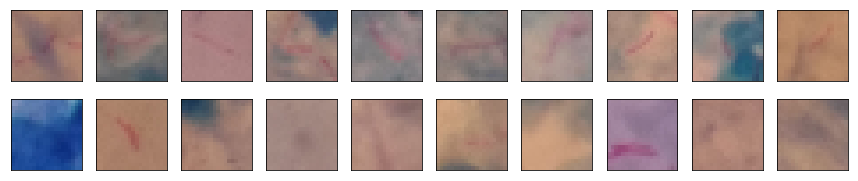

In [5]:
N_samples_to_display = 10
pos_indices = np.where(train_y)[0]
pos_indices = pos_indices[np.random.permutation(len(pos_indices))]
for i in range(N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_pos = train_X[pos_indices[i],:,:,:]
    example_pos = np.swapaxes(example_pos,0,2)
    plt.imshow(example_pos)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

neg_indices = np.where(train_y==0)[0]
neg_indices = neg_indices[np.random.permutation(len(neg_indices))]
for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = train_X[neg_indices[i],:,:,:]
    example_neg = np.swapaxes(example_neg,0,2)
    plt.imshow(example_neg)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')
plt.gcf().set_size_inches(1.5*N_samples_to_display,3)

### CNN training

In [6]:
def CNN(n_epochs):
    net1 = NeuralNet(
        layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),      #Convolutional layer.  Params defined below
        ('pool1', layers.MaxPool2DLayer),   # Like downsampling, for execution speed
        ('lstm', layers.LSTMLayer),
        ('output', layers.DenseLayer),
        ],
        
    input_shape=(None, 3, opts['patch_size'][0]/opts['image_downsample'], 
                 opts['patch_size'][0]/opts['image_downsample']),
    conv1_num_filters=7, 
    conv1_filter_size=(3, 3), 
    conv1_nonlinearity=lasagne.nonlinearities.rectify,
        
    pool1_pool_size=(2, 2),
        
    lstm_num_units=50,
       
    output_num_units=2, 
    output_nonlinearity=lasagne.nonlinearities.softmax,

    update_learning_rate=0.0001,
    update_momentum=0.9,

    max_epochs=n_epochs,
    verbose=1,
    )
    return net1

cnn = CNN(500).fit(train_X, train_y)

# Neural Network with 27448 learnable parameters

## Layer information

  #  name    size
---  ------  -------
  0  input   3x20x20
  1  conv1   7x18x18
  2  pool1   7x9x9
  3  lstm    7x50
  4  output  2

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1     0.65828     0.63129    1.04276      0.64930  32.01s
      2     0.60316     0.56830    1.06136      0.72982  32.14s
      3     0.53073     0.49358    1.07528      0.81665  30.97s
      4     0.45453     0.42128    1.07893      0.86335  29.98s
      5     0.38875     0.36401    1.06796      0.88291  37.99s
      6     0.34046     0.32388    1.05120      0.89431  35.21s
      7     0.30626     0.29399    1.04174      0.90004  27.12s
      8     0.28131     0.27432    1.02548      0.90470  24.67s
      9     0.26525     0.26113    1.01577      0.90986  27.06s
     10     0.25363     0.25177    1.00740      0.91094  25.28s
     11     0.24494     0.244

    101     0.14594     0.15596    0.93576      0.94782  25.91s
    102     0.14549     0.15568    0.93452      0.94789  25.17s
    103     0.14532     0.15566    0.93361      0.94751  25.71s
    104     0.14478     0.15557    0.93066      0.94802  25.56s
    105     0.14447     0.15495    0.93241      0.94827  25.50s
    106     0.14494     0.15476    0.93649      0.94821  25.64s
    107     0.14399     0.15483    0.93002      0.94770  25.88s
    108     0.14415     0.15562    0.92626      0.94789  25.52s
    109     0.14354     0.15445    0.92935      0.94833  25.77s
    110     0.14331     0.15401    0.93050      0.94961  25.49s
    111     0.14285     0.15397    0.92782      0.94872  25.54s
    112     0.14292     0.15325    0.93258      0.94884  25.50s
    113     0.14281     0.15339    0.93100      0.94827  25.29s
    114     0.14180     0.15280    0.92799      0.94891  25.25s
    115     0.14164     0.15254    0.92855      0.94878  25.23s
    116     0.14164     0.15244    0.929

    212     0.12380     0.14037    0.88192      0.95413  24.60s
    213     0.12376     0.14102    0.87758      0.95394  24.60s
    214     0.12379     0.14059    0.88049      0.95394  24.60s
    215     0.12361     0.14075    0.87819      0.95388  24.66s
    216     0.12382     0.14082    0.87926      0.95381  24.69s
    217     0.12347     0.14024    0.88045      0.95413  24.95s
    218     0.12332     0.14043    0.87816      0.95413  24.54s
    219     0.12286     0.14001    0.87751      0.95470  24.65s
    220     0.12283     0.14013    0.87654      0.95426  24.73s
    221     0.12292     0.14003    0.87779      0.95381  24.66s
    222     0.12286     0.13997    0.87780      0.95413  24.75s
    223     0.12245     0.13986    0.87554      0.95375  25.41s
    224     0.12251     0.13931    0.87942      0.95490  24.61s
    225     0.12235     0.13967    0.87600      0.95477  24.43s
    226     0.12183     0.13966    0.87235      0.95420  24.68s
    227     0.12200     0.13933    0.875

    327     0.11004     0.13280    0.82862      0.95592  24.39s
    328     0.10969     0.13224    0.82945      0.95604  24.31s
    329     0.10997     0.13287    0.82769      0.95611  24.38s
    330     0.10969     0.13208    0.83049      0.95649  24.37s
    331     0.10966     0.13216    0.82974      0.95642  24.60s
    332     0.10931     0.13176    0.82961      0.95649  24.38s
    333     0.10967     0.13216    0.82982      0.95662  24.50s
    334     0.10934     0.13208    0.82782      0.95668  24.39s
    335     0.10944     0.13244    0.82633      0.95636  24.44s
    336     0.10927     0.13183    0.82888      0.95636  24.47s
    337     0.10910     0.13225    0.82490      0.95668  24.42s
    338     0.10900     0.13164    0.82803      0.95674  24.47s
    339     0.10886     0.13139    0.82857      0.95662  24.60s
    340     0.10895     0.13140    0.82916      0.95668  24.45s
    341     0.10881     0.13166    0.82647      0.95693  24.48s
    342     0.10874     0.13118    0.828

    441     0.09989     0.12607    0.79238      0.95834  24.85s
    442     0.09980     0.12653    0.78878      0.95764  24.71s
    443     0.09963     0.12610    0.79003      0.95814  24.57s
    444     0.09954     0.12643    0.78729      0.95827  24.63s
    445     0.09975     0.12616    0.79067      0.95846  24.60s
    446     0.09939     0.12603    0.78864      0.95865  24.55s
    447     0.09975     0.12591    0.79223      0.95897  24.59s
    448     0.09901     0.12607    0.78541      0.95878  24.55s
    449     0.09899     0.12601    0.78559      0.95802  24.67s
    450     0.09908     0.12679    0.78142      0.95821  24.70s
    451     0.09895     0.12579    0.78667      0.95846  24.58s
    452     0.09905     0.12583    0.78723      0.95853  24.62s
    453     0.09895     0.12574    0.78694      0.95783  24.68s
    454     0.09873     0.12566    0.78566      0.95840  24.58s
    455     0.09861     0.12611    0.78198      0.95821  24.60s
    456     0.09877     0.12607    0.783

In [13]:
#cnn.save_weights_to('tuberculosis.hdf5')
cnn1=CNN(500)
cnn1.load_weights_from('tuberculosis.hdf5')

Loaded parameters to layer 'conv1' (shape 7x3x3x3).
Loaded parameters to layer 'conv1' (shape 7).
Loaded parameters to layer 'lstm' (shape 81x50).
Loaded parameters to layer 'lstm' (shape 50x50).
Loaded parameters to layer 'lstm' (shape 50).
Loaded parameters to layer 'lstm' (shape 81x50).
Loaded parameters to layer 'lstm' (shape 50x50).
Loaded parameters to layer 'lstm' (shape 50).
Loaded parameters to layer 'lstm' (shape 81x50).
Loaded parameters to layer 'lstm' (shape 50x50).
Loaded parameters to layer 'lstm' (shape 50).
Loaded parameters to layer 'lstm' (shape 81x50).
Loaded parameters to layer 'lstm' (shape 50x50).
Loaded parameters to layer 'lstm' (shape 50).
Loaded parameters to layer 'lstm' (shape 50).
Loaded parameters to layer 'lstm' (shape 50).
Loaded parameters to layer 'lstm' (shape 50).
Loaded parameters to layer 'lstm' (shape 1x50).
Loaded parameters to layer 'lstm' (shape 1x50).
Loaded parameters to layer 'output' (shape 350x2).
Loaded parameters to layer 'output' (shap

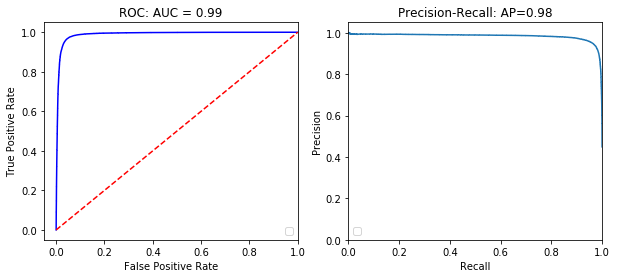

In [14]:
y_pred = cnn1.predict_proba(test_X)

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test_y, y_pred[:,1])
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

precision, recall, thresholds = metrics.precision_recall_curve(test_y, y_pred[:,1])
average_precision = metrics.average_precision_score(test_y, y_pred[:, 1])

subplot(121)
plt.title('ROC: AUC = %0.2f'% roc_auc)
plt.plot(false_positive_rate, true_positive_rate, 'b')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylim([-.05, 1.05])
plt.xlim([-.05, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

subplot(122)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")

plt.gcf().set_size_inches(10,4)

plt.savefig('figs/tuberculosis-patchevaluation.png', bbox_inches='tight')

### Make predictions and evaluate on test data

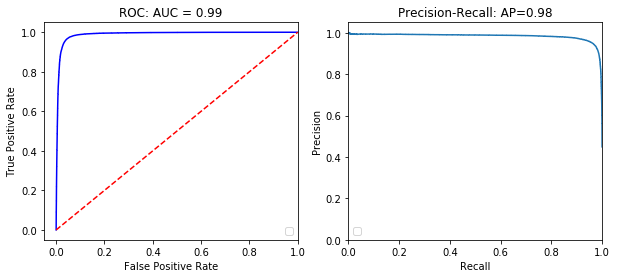

In [7]:
y_pred = cnn.predict_proba(test_X)

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test_y, y_pred[:,1])
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

precision, recall, thresholds = metrics.precision_recall_curve(test_y, y_pred[:,1])
average_precision = metrics.average_precision_score(test_y, y_pred[:, 1])

subplot(121)
plt.title('ROC: AUC = %0.2f'% roc_auc)
plt.plot(false_positive_rate, true_positive_rate, 'b')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylim([-.05, 1.05])
plt.xlim([-.05, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

subplot(122)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")

plt.gcf().set_size_inches(10,4)

plt.savefig('figs/tuberculosis-patchevaluation.png', bbox_inches='tight')

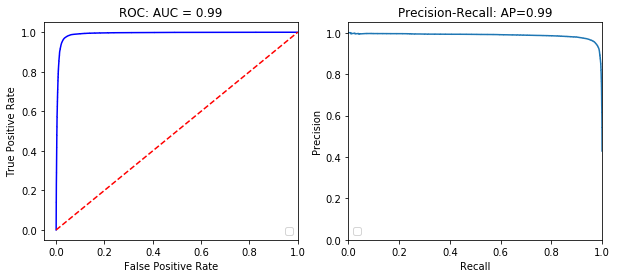

In [8]:
y_pred = cnn.predict_proba(train_X)

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(train_y, y_pred[:,1])
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

precision, recall, thresholds = metrics.precision_recall_curve(train_y, y_pred[:,1])
average_precision = metrics.average_precision_score(train_y, y_pred[:, 1])

subplot(121)
plt.title('ROC: AUC = %0.2f'% roc_auc)
plt.plot(false_positive_rate, true_positive_rate, 'b')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylim([-.05, 1.05])
plt.xlim([-.05, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

subplot(122)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")

plt.gcf().set_size_inches(10,4)

plt.savefig('figs/tuberculosis-patchevaluation.png', bbox_inches='tight')

In [9]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test_y, y_pred[:,1])
true_positive_rate.shape, thresholds.shape
plt.plot(true_positive_rate, thresholds,label='True positive rate')
plt.plot(false_positive_rate, thresholds, label='False positive rate')
plt.xlabel('Threshold')
plt.ylim([0,1.01])
plt.legend(loc='upper left')

ValueError: Found arrays with inconsistent numbers of samples: [78483 80285]

**Examine mistakes to understand network performance: false positives.** 

Find the negative-labelled patches with highest prediction score

In [ ]:
neg_indices = np.where(test_y==0)[0]
neg_scores = y_pred[neg_indices,1]
neg_indices = neg_indices[neg_scores.argsort()]
neg_indices = neg_indices[::-1]

neg_scores = y_pred[neg_indices,1]

N_samples_to_display = 12
offset = 55
for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = test_X[neg_indices[i+offset],:,:,:]
    example_neg = np.swapaxes(example_neg,0,2)
    plt.imshow(example_neg)
    plt.title('%.3f' % neg_scores[i+offset])
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

plt.gcf().set_size_inches(1.5*N_samples_to_display,3) 

plt.savefig('figs/tuberculosis-falsedetections.png', bbox_inches='tight')

See highest-scored test patches

In [ ]:
prob_range = [.95,1.]

tmp_scores = y_pred.copy()[:,1]
tmp_scores[tmp_scores<prob_range[0]] = -1
tmp_scores[tmp_scores>prob_range[1]] = -1

pos_indices = tmp_scores.argsort()
pos_indices = pos_indices[::-1]

N_samples_to_display = 12
offset = 0
for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = test_X[pos_indices[i+offset],:,:,:]
    example_neg = np.swapaxes(example_neg,0,2)
    plt.imshow(example_neg)
    plt.title('%.3f' % (tmp_scores[pos_indices[i+offset]]))
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

plt.gcf().set_size_inches(1.5*N_samples_to_display,3) 

plt.savefig('figs/tuberculosis-detectedpatches.png', bbox_inches='tight')

See lowest scored test patches

In [ ]:
pos_indices = y_pred[:,1].argsort()

N_samples_to_display = 12

for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = test_X[pos_indices[i],:,:,:]
    example_neg = np.swapaxes(example_neg,0,2)
    plt.imshow(example_neg)
    plt.title('%.3f' % (y_pred[pos_indices[i],1]))
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

plt.gcf().set_size_inches(1.5*N_samples_to_display,3) 

plt.savefig('figs/tuberculosis-testpatches-lowprob.png', bbox_inches='tight')

### Example of objects detected in an entire image

The white boxes represent annotations in the training data. Red boxes are detections by the convnet.

In [ ]:
reload(det)

fname = testfiles[0]
imfile = opts['img_dir'] + fname
opts['detection_probability_threshold'] = 0.99
found = det.detect(imfile, cnn, opts)

im = misc.imread(imfile)

plt.box(False)
plt.xticks([])
plt.yticks([])

annofile = opts['annotation_dir'] + fname[:-3] + 'xml'
bboxes = readdata.get_bounding_boxes_for_single_image(annofile)
for bb in bboxes:
    bb = bb.astype(int)
    cv2.rectangle(im, (bb[0],bb[2]), (bb[1],bb[3]), (255,255,255), 8)  

for f in found:
    f = f.astype(int)
    cv2.rectangle(im, (f[0],f[1]), (f[2],f[3]), (255,0,0), 8)

plt.gcf().set_size_inches(10,10)
plt.title('Detected objects in %s' % (imfile))
plt.imshow(im)

#cv2.imwrite('detectionimages/detected-' + os.path.basename(imfile),im)

### Evaluation: compare with classification based on morphological feature extraction

In [ ]:
featureset = [3,7,11,12,15,17]
centiles = [0,25,50,75,100]

pb = ProgressBar(train_X.shape[0])
train_X_f = []
for i in range(train_X.shape[0]):
    if i % 100 == 0:
        pb.step(i)
    graypatch = cv2.cvtColor(np.swapaxes(train_X[i,:,:,:],0,2).astype('uint8'), cv2.COLOR_BGR2GRAY)
    train_X_f.append(shapefeatures.extract(graypatch,attributes=featureset,centiles=centiles, momentfeatures=True))
train_X_f = np.vstack(train_X_f)

test_X_f = []
for i in range(test_X.shape[0]):
    if i % 100 == 0:
        pb.step(i)
    graypatch = cv2.cvtColor(np.swapaxes(test_X[i,:,:,:],0,2).astype('uint8'), cv2.COLOR_BGR2GRAY)
    test_X_f.append(shapefeatures.extract(graypatch,attributes=featureset,centiles=centiles, momentfeatures=True))
test_X_f = np.vstack(test_X_f)

In [ ]:
clf = ensemble.ExtraTreesClassifier(n_estimators=100, max_depth=5, n_jobs=-1)
clf.fit(train_X_f, train_y)
y_pred_CLF = clf.predict_proba(test_X_f)

In [ ]:
false_positive_rate_CNN, true_positive_rate_CNN, thresholds_CNN = metrics.roc_curve(test_y, y_pred[:,1])
roc_auc_CNN = metrics.auc(false_positive_rate_CNN, true_positive_rate_CNN)

precision_CNN, recall_CNN, thresholds_CNN = metrics.precision_recall_curve(test_y, y_pred[:,1])
average_precision_CNN = metrics.average_precision_score(test_y, y_pred[:, 1])

false_positive_rate_CLF, true_positive_rate_CLF, thresholds_CLF = metrics.roc_curve(test_y, y_pred_CLF[:,1])
roc_auc_CLF = metrics.auc(false_positive_rate_CLF, true_positive_rate_CLF)

precision_CLF, recall_CLF, thresholds_CLF = metrics.precision_recall_curve(test_y, y_pred_CLF[:,1])
average_precision_CLF = metrics.average_precision_score(test_y, y_pred_CLF[:, 1])

subplot(211)
plt.title('ROC' )
plt.plot(false_positive_rate_CNN, true_positive_rate_CNN, 'b', label='CNN: AUC=%.2f' % (roc_auc_CNN))
plt.plot(false_positive_rate_CLF, true_positive_rate_CLF, 'k--', label='ERT: AUC=%.2f' % (roc_auc_CLF))
plt.legend(loc='lower right')
plt.ylim([-.05, 1.05])
plt.xlim([-.05, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

subplot(212)
plt.plot(recall_CNN, precision_CNN, label='CNN: AP=%.2f' % (average_precision_CNN))
plt.plot(recall_CLF, precision_CLF,'k--', label='ERT: AP=%.2f' % (average_precision_CLF))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.legend(loc="lower left")

plt.gcf().set_size_inches(4,10)

plt.savefig('figs/tuberculosis-patchevaluation.png', bbox_inches='tight')

In [ ]:
results = {
"false_positive_rate_CNN": false_positive_rate_CNN,
"true_positive_rate_CNN": true_positive_rate_CNN,
"false_positive_rate_CLF": false_positive_rate_CLF,
"true_positive_rate_CLF": true_positive_rate_CLF,
"roc_auc_CNN": roc_auc_CNN,
"roc_auc_CLF": roc_auc_CLF,
"recall_CNN": recall_CNN,
"precision_CNN": precision_CNN,
"average_precision_CNN": average_precision_CNN,
"recall_CLF": recall_CLF,
"precision_CLF": precision_CLF,
"average_precision_CLF": average_precision_CLF,
"opts": opts
}
import pickle
pickle.dump(results,open('tuberculosis-results.pkl','w'))